In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load Dataset
data = pd.read_csv("Bike.csv")
print("Dataset Loaded Successfully\n")
print(data.head())

Dataset Loaded Successfully

                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  


In [3]:
# Handle Missing Values
data = data.dropna()

In [4]:
# Encode Categorical Columns
label_encoders = {}

for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [5]:
# Define Features and Target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Create Naive Bayes Model
model = GaussianNB()

In [12]:
# Train the Model
model.fit(X_train, y_train)

GaussianNB()

In [13]:
# Make Predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate the Model
print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.2777777777777778

Confusion Matrix:

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:

              precision    recall  f1-score   support

     42859.0       0.00      0.00      0.00         1
     44756.0       0.00      0.00      0.00         1
     46779.0       0.00      0.00      0.00         1
     47032.0       0.00      0.00      0.00         1
     47186.0       0.00      0.00      0.00         1
     48000.0       0.00      0.00      0.00         1
     49412.0       1.00      1.00      1.00         1
     49521.0       0.00      0.00      0.00         1
     49600.0       0.00      0.00      0.00         0
     50267.0       1.00      0.83      0.91         6
     50280.0       0.00      0.00      0.00         1
     51000.0       0.00      0.00      0.00         3
     51185.0       0.00      0.00      0.00         1
     51600.0       0.00      0.00      0.00     

<Figure size 800x600 with 0 Axes>

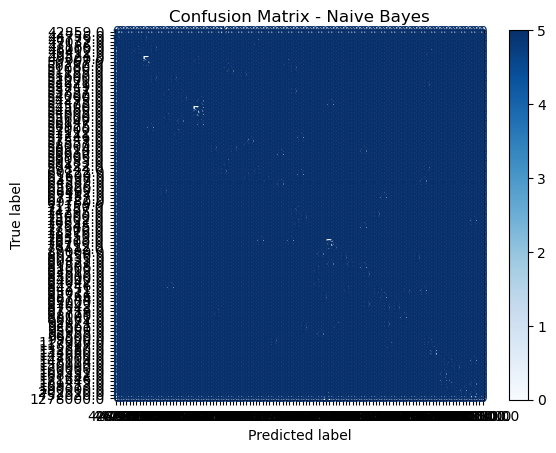

In [16]:
#Confusion Matrix Visualisation
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues"
)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()